In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


In [ ]:
digits = load_digits()


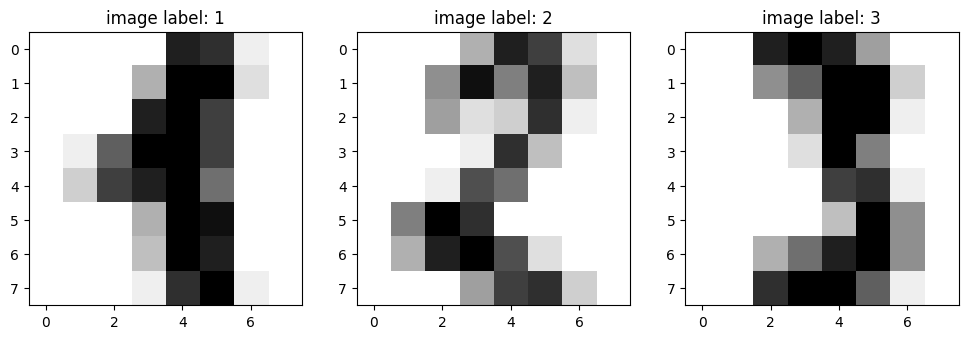

In [ ]:
sample_index = np.array([11, 50, 62])
plt.figure(figsize=(12, 12))
for i in np.arange(sample_index.shape[0]):
    plt.subplot(131 + i)
    plt.imshow(digits.images[sample_index[i]], cmap=plt.cm.gray_r,
           interpolation='nearest')
    plt.title("image label: %d" % digits.target[sample_index[i]])
plt.show()

### Preprocessing

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, dtype='uint8')
y_test = to_categorical(y_test, dtype='uint8')

# Vérification des résultats
print("X_train shape:", X_train.shape)
print("y_train shape:", train_labels_one_hot.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", test_labels_one_hot.shape)


X_train shape: (1437, 64)
y_train shape: (1437, 10)
X_test shape: (360, 64)
y_test shape: (360, 10)


### Building and training the neural network

In [ ]:
n_i = X_train.shape[1]
n_h = 100
n_o = 10

# Création du modèle
model = Sequential()
model.add(Dense(n_h, input_dim=n_i))
model.add(Activation("tanh"))
model.add(Dense(n_o))
model.add(Activation("softmax"))

# Compilation du modèle
model.compile(optimizer=SGD(learning_rate=10000),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, train_labels_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
45/45 [==============================] - 3s 26ms/step - loss: 7530.8418 - accuracy: 0.7035 - val_loss: 4253.9692 - val_accuracy: 0.8028
Epoch 2/10
45/45 [==============================] - 0s 10ms/step - loss: 3375.5598 - accuracy: 0.8420 - val_loss: 5979.2139 - val_accuracy: 0.8056
Epoch 3/10
45/45 [==============================] - 0s 10ms/step - loss: 2594.2432 - accuracy: 0.8768 - val_loss: 3281.1392 - val_accuracy: 0.8806
Epoch 4/10
45/45 [==============================] - 1s 13ms/step - loss: 2457.8433 - accuracy: 0.8866 - val_loss: 4346.3779 - val_accuracy: 0.8667
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 2175.4128 - accuracy: 0.9026 - val_loss: 4138.3569 - val_accuracy: 0.8500
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 1612.4525 - accuracy: 0.9200 - val_loss: 2931.4084 - val_accuracy: 0.8833
Epoch 7/10
45/45 [==============================] - 0s 5ms/step - loss: 1584.1305 - accuracy: 0.9151 - val_loss: 4374.42

Training with standard deviation: 0
Training with standard deviation: 0.5
Training with standard deviation: 1.0
Training with standard deviation: 2.0
Training with standard deviation: 10.0


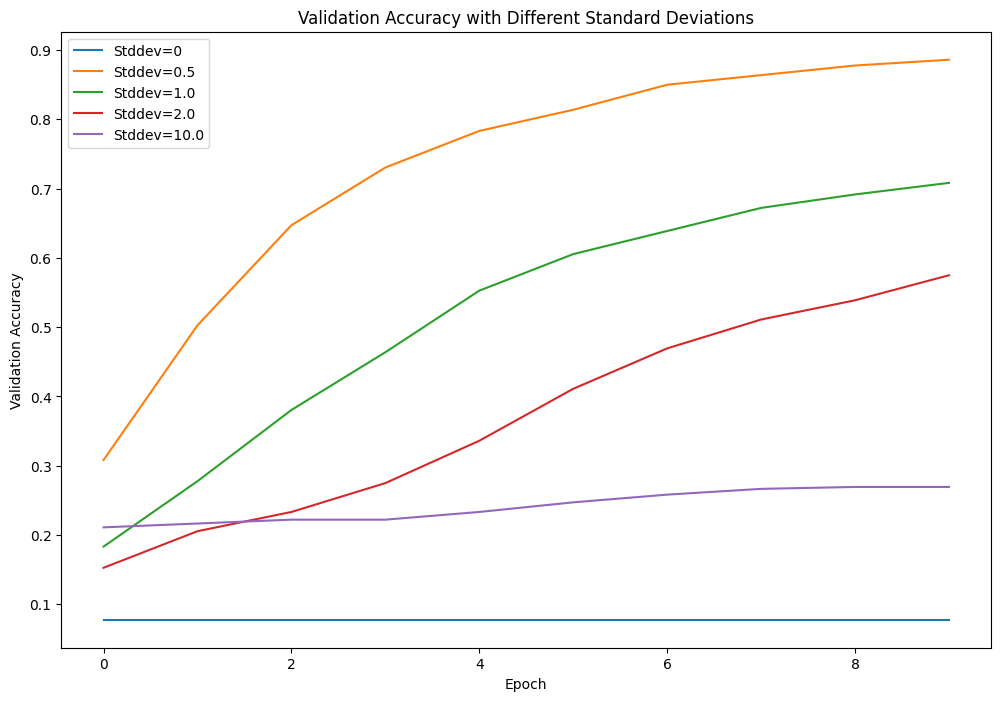

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
from keras.optimizers import Adam
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

def train_model_with_custom_init(stddev, epochs=10):
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], kernel_initializer=RandomNormal(stddev=stddev), activation='relu'))
    model.add(Dense(10, kernel_initializer=RandomNormal(stddev=stddev), activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, train_labels_one_hot, epochs=epochs, batch_size=32, validation_data=(X_test, test_labels_one_hot), verbose=0)
    return history

# Testing different standard deviations
stddevs = [0, 0.5, 1.0, 2.0, 10.0]  # Different standard deviations
histories = {}

for stddev in stddevs:
    print(f"Training with standard deviation: {stddev}")
    histories[stddev] = train_model_with_custom_init(stddev)

# Plotting results
plt.figure(figsize=(12, 8))
for stddev, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Stddev={stddev}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy with Different Standard Deviations')
plt.show()

## 2) Training a neural network with numpy

In [ ]:
def softmax(X):
    max_X = np.max(X, axis=1, keepdims=True)
    e_X = np.exp(X - max_X)
    sum_e_X = np.sum(e_X, axis=1, keepdims=True)
    softmax_probs = e_X / sum_e_X

    return softmax_probs

def sigmoid(X):
    return 1/(1+np.exp(-X))

def dsigmoid(X):
    return -np.exp(-X)/(1+np.exp(-X))**2

def nll(Y_true, Y_pred):
    return -np.sum(Y_true*np.log(Y_pred))

In [ ]:
class NeuralNet():
    """MLP with 1 hidden layer and a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W_h = np.random.uniform(-0.01, 0.01, (input_size, hidden_size))
        self.b_h = np.zeros((1, hidden_size))
        self.W_o = np.random.uniform(-0.01, 0.01, (hidden_size, output_size))
        self.b_o = np.zeros((1, output_size))
        self.output_size = output_size

    def forward(self, X):
        return self.forward_with_hidden(X)[0]

    def forward_with_hidden(self, X):
        z_h = X @ self.W_h + self.b_h
        h = sigmoid(z_h)
        z_o = h @ self.W_o + self.b_o
        y = softmax(z_o)
        return y, z_h, h, z_o

    def loss(self, X, y):
        return nll(y, self.forward(X))

    def grad_loss(self, X, y_true):
        y_pred, z_h, h, z_o = self.forward_with_hidden(X)
        grad_y = y_pred - y_true

        grad_W_o = h.T @ grad_y
        grad_b_o = np.sum(grad_y, axis=0, keepdims=True)

        grad_h = grad_y @ self.W_o.T * (h * (1 - h))
        grad_W_h = X.T @ grad_h
        grad_b_h = np.sum(grad_h, axis=0, keepdims=True)

        return {
            'grad_W_h': grad_W_h,
            'grad_b_h': grad_b_h,
            'grad_W_o': grad_W_o,
            'grad_b_o': grad_b_o
        }

    def train_sample(self, x, y, lr):
        grad_loss = self.grad_loss(x[np.newaxis, :], y[np.newaxis, :])
        self.W_h -= lr * grad_loss['grad_W_h']
        self.b_h -= lr * grad_loss['grad_b_h']
        self.W_o -= lr * grad_loss['grad_W_o']
        self.b_o -= lr * grad_loss['grad_b_o']

    def fit(self, X_train, Y_train, lr, n_epochs):
        losses = []
        for epoch in range(n_epochs):
            for x, y in zip(X_train, Y_train):
                self.train_sample(x, y, lr)
            epoch_loss = np.mean([self.loss(x, y) for x, y in zip(X_train, Y_train)])
            losses.append(epoch_loss)
            print(f'Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss}')
        return losses

    def predict(self, X):
        y = self.forward(X)
        return np.argmax(y, axis=1)

    def accuracy(self, X, y):
        y_preds = self.predict(X)
        return np.mean(y_preds == np.argmax(y, axis=1))

Epoch 1/20, Loss: 2.2491664025448928
Epoch 2/20, Loss: 1.2703136808675257
Epoch 3/20, Loss: 0.6888506420021653
Epoch 4/20, Loss: 0.45348485944584205
Epoch 5/20, Loss: 0.32904907451002474
Epoch 6/20, Loss: 0.25411252170652027
Epoch 7/20, Loss: 0.2064447045756045
Epoch 8/20, Loss: 0.17412664743312678
Epoch 9/20, Loss: 0.15082190867690723
Epoch 10/20, Loss: 0.13316504206247004
Epoch 11/20, Loss: 0.11927135644329717
Epoch 12/20, Loss: 0.10801711240518326
Epoch 13/20, Loss: 0.09869100999033281
Epoch 14/20, Loss: 0.09081930259858935
Epoch 15/20, Loss: 0.08407345114317002
Epoch 16/20, Loss: 0.0782181781128861
Epoch 17/20, Loss: 0.07308049857813287
Epoch 18/20, Loss: 0.06853037912339842
Epoch 19/20, Loss: 0.06446818692207755
Epoch 20/20, Loss: 0.06081627500184016


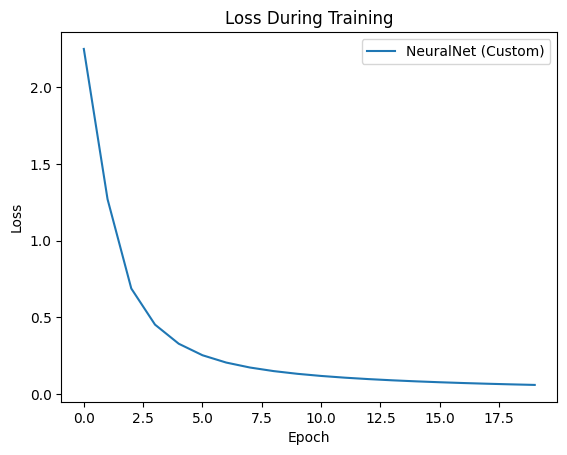

In [ ]:
# Initialize and train the model
input_size = X_train.shape[1]
hidden_size = 100
output_size = y_train.shape[1]
model = NeuralNet(input_size, hidden_size, output_size)

# Train the model
lr = 0.01
n_epochs = 20
losses = model.fit(X_train, y_train, lr, n_epochs)

# Plot the loss
plt.plot(losses, label='NeuralNet (Custom)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()

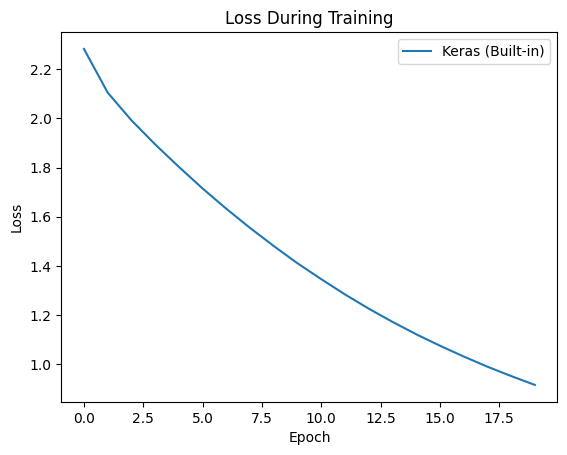

In [ ]:
model_keras = Sequential()
model_keras.add(Dense(hidden_size, input_dim=input_size, activation='sigmoid'))
model_keras.add(Dense(output_size, activation='softmax'))
model_keras.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Keras model
history = model_keras.fit(X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)

# Plot the Keras loss
plt.plot(history.history['loss'], label='Keras (Built-in)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.show()